In [3]:
from IPython.display import Image

## 2. Parameter Tuning

The notebook for the whole parameter tuning procedure is `parameter_tuning.ipynb`.
This section summarizes the results.

### 2.1 Parameter Space

To find suitable parameters that perform well on 10clusters and Chainlink, we decided to vary the following SOM parameters:
* sigma
* learning rate
* initialization strategy
* neighborhood function

To train the SOMs we used the library `somoclu` (see https://somoclu.readthedocs.io/en/stable/reference.html for documentation).
The library `somoclu` has no parameter called `sigma` instead it defines two parameters `radius0` and `radiusN` that allow a more fine-grained control of how `sigma` shall behave over time.
Additionally, the parameter `learning rate` is also computed using two parameters `scale0` and `scaleN` that allow to adapt the `learning rate` during the training process.
In essence, we considered the following values as our parameter space:
* (radius0, radiusN): [(min(n_columns, n_rows)/2, 1), (min(n_columns, n_rows)/10, min(n_columns, n_rows)/10), (min(n_columns, n_rows), min(n_columns, n_rows)/2)]
* (scale0, scaleN): [(0.7, 0.7), (0.1, 0.01), (1, 0.01)]
* intialization strategy: [pca, random]
* neighborhood funtion: [bubble, gaussian]

The parameter space covers all the default values of the `somoclu` implementation and, in addition, some extreme parameter configurations such as a learning rate starting at 1 and ending at 0.01.

### Experimental Setting

We executed each of the above described parameter settings in conjunction with the default `somoclu` parameters, e.g., when testing for the best (radius0, radiusN) configuration we execturd each value of (radius0, radiusN) one time without changing the other parameter configurations.
Thus, we ended with 10 independent runs for 10clusters and Chainlink, so 20 runs in total (3 times radius + 3 times scale + 2 times initialization + 2 times neighborhood = 10 runs).

To find suitable parameter values we fixed the net size to 20x20 and the epochs to 100 (which is quite a bit since the default epoch number, defined in https://somoclu.readthedocs.io/en/stable/reference.html, is set to 10).
Due to this relatively large epoch number, we expected the SOMs to be accordingly trained and to deliver clear structures. (at least for good parameter configurations)

We found it quite challenging to compare different SOMs soley based on their visualization output,hence to obtain a quantitative measure over the various parameter settings, we used the `mean quantization error` measure.
We figured that low measures of `mean quantization error` represent clear SOM structures quite well.

### Results on 10clusters

For some parmeters we obtained quite different results.
For example, when testing for the best setting for (radius0, radiusN), we obtained for (min(n_columns, n_rows)/2, 1) with a `mean quantization error` of 0.34 the follwing SOM (background is a U-Matrix):

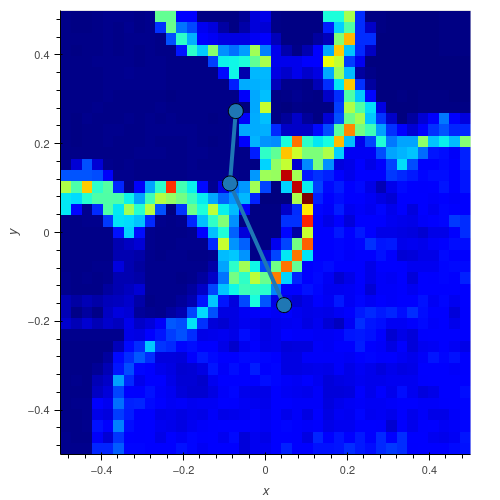

In [5]:
Image(filename = "./images_ex3/paratuning_radius_good.png", width = 500)

However, if we change the same parameter to (min(n_columns, n_rows), min(n_columns, n_rows)/2), we obtain the follwoing SOM with a `mean quantization error` of 1.44:

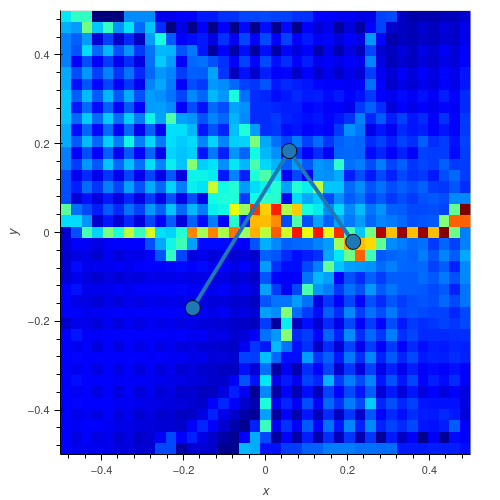

In [6]:
Image(filename = "./images_ex3/paratuning_radius_weak.png", width = 500)

Other parameters seem to be less sensitive.
For instance, if we consider the initialization strategy, then we found nearly no difference between random initialization and pca.
For random initialization we obtained a `mean quantization error` of 0.35 and for pca 0.36, respectively.
The following two plot show the outcome of random initialization:

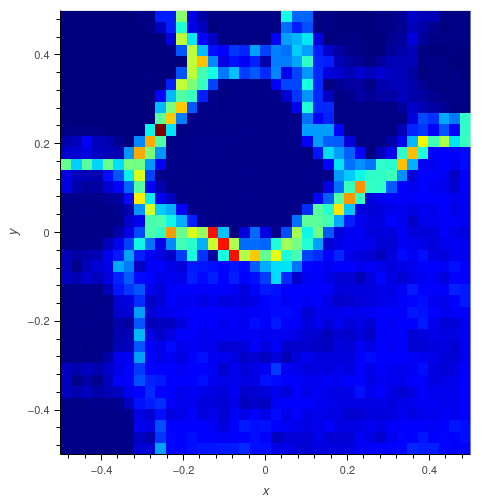

In [7]:
Image(filename = "./images_ex3/paratuning_initialization_random.png", width = 500)

We can see that the 10 clusters are clearly visible.

After comparing the different outcomes, we found the following parameter configuration best performing for 10clusters:
* (radius0, radiusN): (min(n_columns, n_rows)/2, 1)
* (scale0, scaleN): (0.1, 0.01)
* initialization strategy: random
* neighborhood function: gaussian

### Results on Chainlink

The results of the individual paramter configurations on Chainlink was quite similar when compared to 10clusters.
We noticed that in general the `mean quanitization error` is much smaller.
The only difference is that we found a different (scale0, scaleN) configuration the best.

The following U-Matrix shows the best performing parameter configuration with a `mean quantization error` of 0.041:

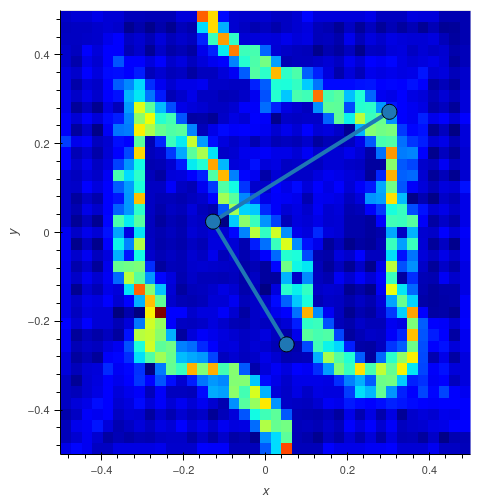

In [8]:
Image(filename = "./images_ex3/paratuning_scale.png", width = 500)

In the end we found the following setting best performing on Chainlink:
* (radius0, radiusN): (min(n_columns, n_rows)/2, 1)
* (scale0, scaleN): (0.7, 0.7)
* initialization strategy: random
* neighborhood function: gaussian